## Attribute Information:
**O DataSet é comporto de diversas medições de voz de 31 pessoas, sendo 23 diagnosticado com a doença de parkinson**

~~~
Informações acerca das colunas. Podemos observar que existe conjunto de colunas para gerar uma informação, como é o caso dos itens 5 e 6 como exemplo.
~~~
_______________________________________________________________________________________________________________
* nome - nome do assunto ASCII e número de gravação
* MDVP:Fo(Hz) - Frequência fundamental vocal média
* MDVP:Fhi(Hz) - Frequência fundamental vocal máxima
* MDVP:Flo(Hz) - Frequência fundamental vocal mínima
* MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Várias medidas de variação na frequência fundamental
* MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Várias medidas de variação de amplitude
* NHR,HNR - Duas medidas de proporção de ruído para componentes tonais na voz
* status - Estado de saúde do sujeito (um) - Parkinson, (zero) - saudável
* RPDE,D2 - Duas medidas de complexidade dinâmica não linear
* DFA - Expoente de escala fractal de sinal
* spread1,spread2,PPE - Três medidas não lineares de variação da frequência fundamental
_______________________________________________________________________________________________________________

>_https://archive.ics.uci.edu/ml/datasets/parkinsons_

# Tipo de analise: Classificação
#### Utilizar o algorítimo XGBClassifier

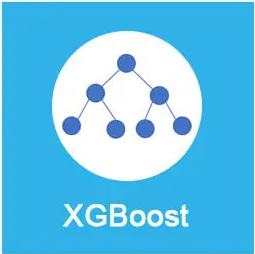

In [14]:
from PIL import Image
im = Image.open("XGBoost.png")
im

In [21]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Testes | avaliação

from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score


from xgboost import XGBClassifier

# Importando os dados

In [2]:
df = pd.read_csv("parkinsons.data")

In [3]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [7]:
df.columns.value_counts()

MDVP:Fo(Hz)         1
MDVP:Jitter(Abs)    1
PPE                 1
spread2             1
MDVP:Jitter(%)      1
MDVP:RAP            1
Jitter:DDP          1
MDVP:Flo(Hz)        1
HNR                 1
D2                  1
RPDE                1
DFA                 1
MDVP:PPQ            1
MDVP:Shimmer        1
MDVP:Fhi(Hz)        1
status              1
NHR                 1
Shimmer:APQ5        1
MDVP:Shimmer(dB)    1
MDVP:APQ            1
Shimmer:DDA         1
name                1
spread1             1
Shimmer:APQ3        1
dtype: int64

### Separando as variáveis entre Target e label 

In [34]:
variaveis_de_entrada  = df.loc[:,df.columns !="status"].values[:,1:]
variaveis_de_entrada 

array([[119.992, 157.302, 74.997, ..., 0.266482, 2.301442, 0.284654],
       [122.4, 148.65, 113.819, ..., 0.33559, 2.486855, 0.368674],
       [116.682, 131.111, 111.555, ..., 0.311173, 2.342259, 0.332634],
       ...,
       [174.688, 240.005, 74.287, ..., 0.158453, 2.679772, 0.131728],
       [198.764, 396.961, 74.904, ..., 0.207454, 2.138608, 0.123306],
       [214.289, 260.277, 77.973, ..., 0.190667, 2.555477, 0.148569]],
      dtype=object)

In [40]:
variaveis_de_saida = df['status'].values
variaveis_de_saida

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [30]:
df_variaveis_de_entrada = df.loc[:,df.columns !="status"]
df_variaveis_de_entrada 

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [86]:
df_variaveis_de_saida = df['status']
df_variaveis_de_saida

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [56]:
print(f"A quantidade de pacientes com Parkinson é {df_variaveis_de_saida[df_variaveis_de_saida==1].shape[0]}\nContra {df_variaveis_de_saida[df_variaveis_de_saida==0].shape[0]} que não foram diagnosticados")

A quantidade de pacientes com Parkinson é 147
Contra 48 que não foram diagnosticados


## Vamos escalonar os dados

In [57]:
scaler = MinMaxScaler((-1,1))

In [58]:
x = scaler.fit_transform(variaveis_de_entrada)

In [61]:
x

array([[-0.63138346, -0.77481654, -0.89037042, ...,  0.17153026,
        -0.21867743, -0.0053808 ],
       [-0.6033463 , -0.81013911, -0.4433544 , ...,  0.48267409,
        -0.05370956,  0.34265204],
       [-0.66992292, -0.88174367, -0.46942324, ...,  0.37274182,
        -0.18236124,  0.19336492],
       ...,
       [ 0.00546073, -0.43717403, -0.89854572, ..., -0.31484696,
         0.11793486, -0.63884033],
       [ 0.28578581,  0.20361309, -0.89144127, ..., -0.09423055,
        -0.36355605, -0.67372646],
       [ 0.46654868, -0.35441175, -0.85610326, ..., -0.16981039,
         0.00734563, -0.5690805 ]])

In [62]:
y = variaveis_de_saida

## Divisão de treino e teste

In [63]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

## Criando o modelo de classificação

Modelo 1

In [72]:

model_1 = XGBClassifier()
model_1.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

#### Resultado do modelo 1 | Testes

In [77]:
y_pred_1 = model_1.predict(X_test)


In [78]:
print(accuracy_score(y_test,y_pred_1)*100)

94.87179487179486


Modelo 2

In [81]:

model_2 = XGBClassifier( learning_rate=0.2)
model_2.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

#### Resultado do modelo 2 | Testes

In [82]:
y_pred_2 = model_2.predict(X_test)

In [84]:
print(accuracy_score(y_test,y_pred_2)*100)

97.43589743589743
